# Read data

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [57]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [58]:
folder_train = 'C:/Users/ZIAD/Desktop/computer vision/train/train/'
folder_test = 'C:/Users/ZIAD/Desktop/computer vision/test/test/'
test = load_images_from_folder(folder_test)
train = load_images_from_folder(folder_train)
train = np.array(train)
test = np.array(test)
test.shape

(4045, 48, 48, 3)

In [59]:
train.shape

(16141, 48, 48, 3)

In [60]:
test_labels = np.loadtxt('C:/Users/ZIAD/Desktop/computer vision/test_dataset_new.csv',delimiter=',',dtype = str,skiprows=1)
train_labels = np.loadtxt('C:/Users/ZIAD/Desktop/computer vision/train_dataset_new.csv',delimiter=',',dtype = str,skiprows=1)
test_labels.shape

(4045, 2)

In [61]:
train_labels.shape

(16141, 2)

## Normailzation

In [62]:
# train = train.reshape(train.shape[0], 48, 48, 1)
# test = test.reshape(test.shape[0], 48, 48, 1)

In [63]:
# test = test.reshape(-1,test.shape[0])
# test = test.reshape(test.shape[0],-1)
# test.shape

In [64]:
# train = train.reshape(-1,train.shape[0])
# train = train.reshape(train.shape[0],-1)
# train.shape

In [65]:
test = test / test.max()
test

array([[[[0.98431373, 0.98431373, 0.98431373],
         [0.90196078, 0.90196078, 0.90196078],
         [0.93333333, 0.93333333, 0.93333333],
         ...,
         [0.48627451, 0.48627451, 0.48627451],
         [0.45490196, 0.45490196, 0.45490196],
         [0.47058824, 0.47058824, 0.47058824]],

        [[0.97254902, 0.97254902, 0.97254902],
         [0.89411765, 0.89411765, 0.89411765],
         [0.9254902 , 0.9254902 , 0.9254902 ],
         ...,
         [0.51372549, 0.51372549, 0.51372549],
         [0.48235294, 0.48235294, 0.48235294],
         [0.48235294, 0.48235294, 0.48235294]],

        [[0.96470588, 0.96470588, 0.96470588],
         [0.90588235, 0.90588235, 0.90588235],
         [0.87843137, 0.87843137, 0.87843137],
         ...,
         [0.50980392, 0.50980392, 0.50980392],
         [0.49019608, 0.49019608, 0.49019608],
         [0.48627451, 0.48627451, 0.48627451]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.04313725, 0.04313725, 0.04313725]

In [66]:
train = train / train.max()
train

array([[[[0.91764706, 0.91764706, 0.91764706],
         [0.94117647, 0.94117647, 0.94117647],
         [0.89803922, 0.89803922, 0.89803922],
         ...,
         [0.44705882, 0.44705882, 0.44705882],
         [0.5372549 , 0.5372549 , 0.5372549 ],
         [0.49411765, 0.49411765, 0.49411765]],

        [[0.91372549, 0.91372549, 0.91372549],
         [0.90588235, 0.90588235, 0.90588235],
         [0.89803922, 0.89803922, 0.89803922],
         ...,
         [0.59607843, 0.59607843, 0.59607843],
         [0.61176471, 0.61176471, 0.61176471],
         [0.4627451 , 0.4627451 , 0.4627451 ]],

        [[0.92156863, 0.92156863, 0.92156863],
         [0.94117647, 0.94117647, 0.94117647],
         [0.93333333, 0.93333333, 0.93333333],
         ...,
         [0.75686275, 0.75686275, 0.75686275],
         [0.77647059, 0.77647059, 0.77647059],
         [0.83529412, 0.83529412, 0.83529412]],

        ...,

        [[0.1254902 , 0.1254902 , 0.1254902 ],
         [0.29803922, 0.29803922, 0.29803922]

In [67]:
test_labels = test_labels[:,1]
test_labels.shape

(4045,)

In [68]:
test_labels = test_labels.astype(int)
# test_labels = test_labels.reshape(1,len(test_labels))
test_labels

array([1, 1, 1, ..., 0, 0, 0])

In [69]:
train_labels = train_labels[:,1]
train_labels.shape

(16141,)

In [70]:
train_labels = train_labels.astype(int)
# train_labels = train_labels.reshape(1,len(train_labels))
train_labels

array([1, 1, 1, ..., 0, 0, 0])

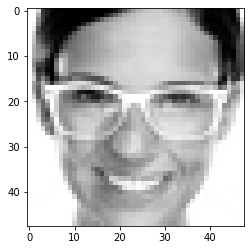

In [71]:
plt.imshow(train[16140])

# Models

# Logistic Regression

In [43]:
def get_report(model,x_train,y_train,x_test,y_test):
  y_pred_train = model.predict(x_train)
  y_pred_test=model.predict(x_test)

  acc_train= accuracy_score(y_train,y_pred_train)
  acc_test=accuracy_score(y_test,y_pred_test)

  f1_train=f1_score(y_train,y_pred_train,average='macro')
  f1_test=f1_score(y_test,y_pred_test,average='macro')

  print('Acuuracy Train : %0.2f'%(acc_train*100))
  print('Acuuracy Test : %0.2f'%(acc_test*100))
  print('F1 Train : %0.2f'%(f1_train*100))
  print('F1 Test : %0.2f'%(f1_test*100))


In [44]:
model_logistic = LogisticRegression()
model_logistic.fit(train,train_labels)
get_report(model_logistic,train,train_labels,test,test_labels)

c:\Users\ZIAD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acuuracy Train : 72.73
Acuuracy Test : 70.14
F1 Train : 72.13
F1 Test : 69.35


In [45]:
from sklearn.metrics import log_loss
probas = model_logistic.predict_proba(train)
log_loss(train_labels, probas)

0.5517742912590049

In [46]:
probas = model_logistic.predict_proba(test)
log_loss(test_labels, probas)

0.5904304673582662

In [52]:
from sklearn.metrics import classification_report

# Generate the classification report
target_names = ['Sad', 'Happy']
y_pred = model_logistic.predict(test)
print(classification_report(test_labels, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Sad       0.67      0.62      0.64      1774
       Happy       0.72      0.77      0.74      2271

    accuracy                           0.70      4045
   macro avg       0.70      0.69      0.69      4045
weighted avg       0.70      0.70      0.70      4045



# Simple NN

In [47]:
# Define the neural network model with two hidden layers
model = MLPClassifier(hidden_layer_sizes=(64,32,16,1), activation='identity', solver='adam', max_iter=30)

# Train the model on the training data
model.fit(train, train_labels)

# Evaluate the model on the testing data
score = model.score(train, train_labels)

print("Model score: {:.2f}".format(score))

c:\Users\ZIAD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Model score: 0.69


In [48]:
# Evaluate the model on the testing data
score = model.score(test, test_labels)

print("Model score: {:.2f}".format(score))

Model score: 0.69


In [49]:
probas = model.predict_proba(train)
log_loss(train_labels, probas)

0.5911458738111709

In [50]:
probas = model.predict_proba(test)
log_loss(test_labels, probas)

0.5873886164946223

In [51]:
get_report(model,train,train_labels,test,test_labels)

Acuuracy Train : 68.82
Acuuracy Test : 68.58
F1 Train : 65.64
F1 Test : 65.23


In [53]:
y_pred = model.predict(test)
print(classification_report(test_labels, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Sad       0.75      0.43      0.54      1774
       Happy       0.67      0.89      0.76      2271

    accuracy                           0.69      4045
   macro avg       0.71      0.66      0.65      4045
weighted avg       0.70      0.69      0.67      4045



# Base CNN model

In [72]:
# Define the model architecture with L2 regularization
model = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    tf.keras.layers.Flatten(),

    # Dense layer with L2 regularization
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),

    # Output layer with one unit (for binary classification)
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [19]:
history = model.fit(train, train_labels, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
404/404 [==============================] - 21s 45ms/step - loss: 0.5930 - accuracy: 0.7344 - val_loss: 0.9334 - val_accuracy: 0.4518
Epoch 2/20
404/404 [==============================] - 17s 42ms/step - loss: 0.4860 - accuracy: 0.7968 - val_loss: 0.9217 - val_accuracy: 0.5011
Epoch 3/20
404/404 [==============================] - 16s 39ms/step - loss: 0.4537 - accuracy: 0.8192 - val_loss: 0.7812 - val_accuracy: 0.6107
Epoch 4/20
404/404 [==============================] - 16s 40ms/step - loss: 0.4329 - accuracy: 0.8274 - val_loss: 0.7845 - val_accuracy: 0.6194
Epoch 5/20
404/404 [==============================] - 17s 43ms/step - loss: 0.4147 - accuracy: 0.8368 - val_loss: 0.7469 - val_accuracy: 0.6420
Epoch 6/20
404/404 [==============================] - 16s 39ms/step - loss: 0.4013 - accuracy: 0.8445 - val_loss: 0.6182 - val_accuracy: 0.7210
Epoch 7/20
404/404 [==============================] - 16s 39ms/step - loss: 0.3891 - accuracy: 0.8529 - val_loss: 0.6369 - val_accuracy:

In [20]:
# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(train, train_labels, verbose=0)
print('Training accuracy: %.3f' % train_acc)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test, test_labels, verbose=0)
print('Test accuracy: %.3f' % test_acc)

Training accuracy: 0.897
Test accuracy: 0.833


# Adress the overfitting with validation set

In [121]:
# Split the data into training and validation sets
train, val, train_labels, val_labels = train_test_split(train, train_labels, test_size=0.2, random_state=42)

# Define data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(train, train_labels, batch_size=32),
                    epochs=12,
                    validation_data=(val, val_labels),
                    callbacks=[early_stopping])

Epoch 1/12
404/404 [==============================] - 39s 81ms/step - loss: 0.7269 - accuracy: 0.5568 - val_loss: 0.6857 - val_accuracy: 0.5875
Epoch 2/12
404/404 [==============================] - 23s 56ms/step - loss: 0.6833 - accuracy: 0.5851 - val_loss: 0.6498 - val_accuracy: 0.6634
Epoch 3/12
404/404 [==============================] - 24s 58ms/step - loss: 0.6651 - accuracy: 0.6178 - val_loss: 0.6188 - val_accuracy: 0.7138
Epoch 4/12
404/404 [==============================] - 24s 60ms/step - loss: 0.6552 - accuracy: 0.6368 - val_loss: 0.6080 - val_accuracy: 0.6897
Epoch 5/12
404/404 [==============================] - 26s 64ms/step - loss: 0.6384 - accuracy: 0.6648 - val_loss: 0.5861 - val_accuracy: 0.7256
Epoch 6/12
404/404 [==============================] - 27s 66ms/step - loss: 0.6272 - accuracy: 0.6761 - val_loss: 0.5410 - val_accuracy: 0.7578
Epoch 7/12
404/404 [==============================] - 26s 65ms/step - loss: 0.6143 - accuracy: 0.6853 - val_loss: 0.5126 - val_accuracy:

# 5-fold Cross validation

0it [00:00, ?it/s]

Fold 1/5
Epoch 1/20
323/323 [==============================] - 18s 55ms/step - loss: 0.5213 - accuracy: 0.7697 - val_loss: 0.3876 - val_accuracy: 0.8548
Epoch 2/20
323/323 [==============================] - 18s 56ms/step - loss: 0.5111 - accuracy: 0.7724 - val_loss: 0.4179 - val_accuracy: 0.8358
Epoch 3/20
323/323 [==============================] - 17s 53ms/step - loss: 0.5033 - accuracy: 0.7803 - val_loss: 0.3884 - val_accuracy: 0.8498
Epoch 4/20
323/323 [==============================] - 19s 59ms/step - loss: 0.5112 - accuracy: 0.7754 - val_loss: 0.3869 - val_accuracy: 0.8428
Epoch 5/20
323/323 [==============================] - 21s 63ms/step - loss: 0.5089 - accuracy: 0.7792 - val_loss: 0.3993 - val_accuracy: 0.8471
Epoch 6/20
323/323 [==============================] - 20s 63ms/step - loss: 0.5040 - accuracy: 0.7812 - val_loss: 0.4002 - val_accuracy: 0.8389
Epoch 7/20
323/323 [==============================] - 21s 65ms/step - loss: 0.5090 - accuracy: 0.7763 - val_loss: 0.4162 - val_

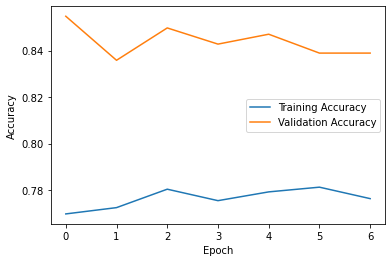

1it [02:20, 140.37s/it]

Fold 2/5
Epoch 1/20
323/323 [==============================] - 20s 63ms/step - loss: 0.5090 - accuracy: 0.7728 - val_loss: 0.4116 - val_accuracy: 0.8362
Epoch 2/20
323/323 [==============================] - 21s 64ms/step - loss: 0.4986 - accuracy: 0.7821 - val_loss: 0.4140 - val_accuracy: 0.8448
Epoch 3/20
323/323 [==============================] - 21s 66ms/step - loss: 0.4977 - accuracy: 0.7863 - val_loss: 0.4080 - val_accuracy: 0.8525
Epoch 4/20
323/323 [==============================] - 21s 65ms/step - loss: 0.4999 - accuracy: 0.7855 - val_loss: 0.4033 - val_accuracy: 0.8405
Epoch 5/20
323/323 [==============================] - 21s 66ms/step - loss: 0.4943 - accuracy: 0.7857 - val_loss: 0.4078 - val_accuracy: 0.8374
Epoch 6/20
323/323 [==============================] - 22s 67ms/step - loss: 0.4945 - accuracy: 0.7872 - val_loss: 0.3998 - val_accuracy: 0.8432
Epoch 7/20
323/323 [==============================] - 25s 77ms/step - loss: 0.4891 - accuracy: 0.7905 - val_loss: 0.4025 - val_

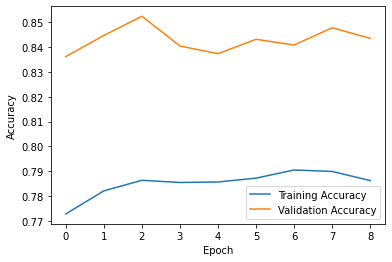

2it [05:44, 178.04s/it]

Fold 3/5
Epoch 1/20
323/323 [==============================] - 22s 69ms/step - loss: 0.5008 - accuracy: 0.7843 - val_loss: 0.4003 - val_accuracy: 0.8389
Epoch 2/20
323/323 [==============================] - 24s 74ms/step - loss: 0.4997 - accuracy: 0.7806 - val_loss: 0.4151 - val_accuracy: 0.8338
Epoch 3/20
323/323 [==============================] - 24s 74ms/step - loss: 0.4978 - accuracy: 0.7826 - val_loss: 0.4046 - val_accuracy: 0.8435
Epoch 4/20
323/323 [==============================] - 25s 78ms/step - loss: 0.4824 - accuracy: 0.7919 - val_loss: 0.3872 - val_accuracy: 0.8513
Epoch 5/20
323/323 [==============================] - 23s 71ms/step - loss: 0.4942 - accuracy: 0.7863 - val_loss: 0.3951 - val_accuracy: 0.8397
Epoch 6/20
323/323 [==============================] - 23s 71ms/step - loss: 0.4891 - accuracy: 0.7948 - val_loss: 0.3899 - val_accuracy: 0.8552
Epoch 7/20
323/323 [==============================] - 23s 70ms/step - loss: 0.4942 - accuracy: 0.7911 - val_loss: 0.3927 - val_

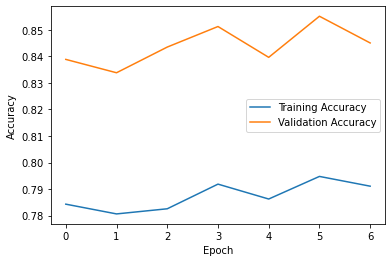

3it [08:35, 174.62s/it]

Fold 4/5
Epoch 1/20
323/323 [==============================] - 22s 69ms/step - loss: 0.4836 - accuracy: 0.7932 - val_loss: 0.3932 - val_accuracy: 0.8389
Epoch 2/20
323/323 [==============================] - 22s 67ms/step - loss: 0.4868 - accuracy: 0.7865 - val_loss: 0.3921 - val_accuracy: 0.8439
Epoch 3/20
323/323 [==============================] - 22s 69ms/step - loss: 0.4850 - accuracy: 0.7940 - val_loss: 0.3882 - val_accuracy: 0.8451
Epoch 4/20
323/323 [==============================] - 23s 72ms/step - loss: 0.4909 - accuracy: 0.7892 - val_loss: 0.3979 - val_accuracy: 0.8408
Epoch 5/20
323/323 [==============================] - 22s 67ms/step - loss: 0.4898 - accuracy: 0.7878 - val_loss: 0.4012 - val_accuracy: 0.8400
Epoch 6/20
323/323 [==============================] - 23s 72ms/step - loss: 0.4954 - accuracy: 0.7908 - val_loss: 0.3997 - val_accuracy: 0.8443
Training accuracy: 0.848
validation accuracy: 0.844


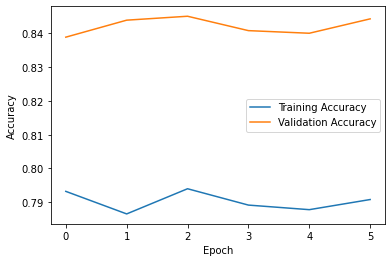

4it [10:56, 161.56s/it]

Fold 5/5
Epoch 1/20
323/323 [==============================] - 23s 70ms/step - loss: 0.4872 - accuracy: 0.7896 - val_loss: 0.4297 - val_accuracy: 0.8292
Epoch 2/20
323/323 [==============================] - 24s 73ms/step - loss: 0.4841 - accuracy: 0.7923 - val_loss: 0.4068 - val_accuracy: 0.8358
Epoch 3/20
323/323 [==============================] - 24s 76ms/step - loss: 0.4851 - accuracy: 0.7938 - val_loss: 0.4061 - val_accuracy: 0.8404
Epoch 4/20
323/323 [==============================] - 23s 70ms/step - loss: 0.4815 - accuracy: 0.8000 - val_loss: 0.4185 - val_accuracy: 0.8362
Epoch 5/20
323/323 [==============================] - 22s 68ms/step - loss: 0.4796 - accuracy: 0.7972 - val_loss: 0.4067 - val_accuracy: 0.8428
Epoch 6/20
323/323 [==============================] - 22s 67ms/step - loss: 0.4781 - accuracy: 0.7957 - val_loss: 0.4081 - val_accuracy: 0.8443
Training accuracy: 0.853
validation accuracy: 0.844


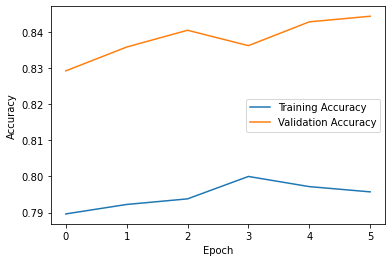

5it [13:20, 160.18s/it]


In [124]:
# Define the number of folds
k = 5

# Split the data into k folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
train_scores = []
val_scores = []

# Train and validate the model on each fold
for fold, (train_indices, val_indices) in tqdm(enumerate(kf.split(train))):

    print(f'Fold {fold+1}/{k}')
    
    train_data1, train_labels1 = train[train_indices], train_labels[train_indices]
    val_data, val_labels = train[val_indices], train_labels[val_indices]

    # Train the model with data augmentation and early stopping
    history = model.fit(datagen.flow(train_data1, train_labels1, batch_size=32),
                    epochs=20,
                    validation_data=(val_data, val_labels),
                    callbacks=[early_stopping])

    # Get the training and validation scores
    train_score = history.history['accuracy']
    val_score = history.history['val_accuracy']


    # Evaluate the model on the training set
    train_loss, train_acc = model.evaluate(train_data1, train_labels1, verbose=0)
    print('Training accuracy: %.3f' % train_acc)

    # Evaluate the model on the test set
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    print('validation accuracy: %.3f' % val_acc)

    train_scores.append(train_acc)
    val_scores.append(val_acc)

    # Create a line chart of the training and validation accuracy over epochs
    plt.plot(train_score, label='Training Accuracy')
    plt.plot(val_score, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

mean_train_score = 84.6
mean_validation_score = 84.3

# Evaluate the test data

In [73]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Define data augmentation for training set
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(train, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test, test_labels),
                    callbacks=[early_stopping])

# Get the training and validation scores
train_score = history.history['accuracy']
val_score = history.history['val_accuracy']

Epoch 1/20
505/505 [==============================] - 39s 71ms/step - loss: 0.6854 - accuracy: 0.6067 - val_loss: 0.6194 - val_accuracy: 0.6680
Epoch 2/20
505/505 [==============================] - 35s 69ms/step - loss: 0.6192 - accuracy: 0.6865 - val_loss: 0.5516 - val_accuracy: 0.7528
Epoch 3/20
505/505 [==============================] - 30s 59ms/step - loss: 0.5826 - accuracy: 0.7206 - val_loss: 0.5243 - val_accuracy: 0.7607
Epoch 4/20
505/505 [==============================] - 30s 59ms/step - loss: 0.5642 - accuracy: 0.7356 - val_loss: 0.4842 - val_accuracy: 0.7985
Epoch 5/20
505/505 [==============================] - 36s 71ms/step - loss: 0.5351 - accuracy: 0.7578 - val_loss: 0.4590 - val_accuracy: 0.8133
Epoch 6/20
505/505 [==============================] - 33s 66ms/step - loss: 0.5261 - accuracy: 0.7667 - val_loss: 0.4612 - val_accuracy: 0.8096
Epoch 7/20
505/505 [==============================] - 33s 66ms/step - loss: 0.5077 - accuracy: 0.7780 - val_loss: 0.4595 - val_accuracy:

In [74]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test ,test_labels, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.4069555997848511
Test accuracy: 0.8472188115119934


In [75]:
train_loss, train_acc = model.evaluate(train ,train_labels, verbose=0)
print('train loss:', train_loss)
print('train accuracy:', train_acc)

train loss: 0.37770017981529236
train accuracy: 0.8551514744758606


In [79]:
y_pred = model.predict(test)
print(classification_report(test_labels, (y_pred>0.5), target_names=target_names))

127/127 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

         Sad       0.85      0.80      0.82      1774
       Happy       0.85      0.89      0.87      2271

    accuracy                           0.85      4045
   macro avg       0.85      0.84      0.84      4045
weighted avg       0.85      0.85      0.85      4045



# Final model with all the data:

In [37]:
# Concatenate train and test data and labels
all_data = np.concatenate((train, test))
all_labels = np.concatenate((train_labels, test_labels))

In [40]:
# Train the model with data augmentation and early stopping, without validation data
history = model.fit(datagen.flow(all_data, all_labels, batch_size=32),
                    epochs=20,
                    callbacks=[early_stopping])
# Get the training scores
train_score = history.history['accuracy']
train_score

Epoch 1/20
631/631 [==============================] - 34s 54ms/step - loss: 0.4424 - accuracy: 0.8201
Epoch 2/20
631/631 [==============================] - 40s 63ms/step - loss: 0.4340 - accuracy: 0.8251
Epoch 3/20
631/631 [==============================] - 42s 67ms/step - loss: 0.4371 - accuracy: 0.8239
Epoch 4/20
631/631 [==============================] - 40s 63ms/step - loss: 0.4311 - accuracy: 0.8282
Epoch 5/20
631/631 [==============================] - 42s 67ms/step - loss: 0.4232 - accuracy: 0.8345
Epoch 6/20
631/631 [==============================] - 37s 59ms/step - loss: 0.4229 - accuracy: 0.8356
Epoch 7/20
631/631 [==============================] - 37s 59ms/step - loss: 0.4206 - accuracy: 0.8352
Epoch 8/20
631/631 [==============================] - 38s 61ms/step - loss: 0.4198 - accuracy: 0.8363
Epoch 9/20
631/631 [==============================] - 36s 57ms/step - loss: 0.4164 - accuracy: 0.8378
Epoch 10/20
631/631 [==============================] - 38s 61ms/step - loss: 0.411

[0.8200733065605164,
 0.8251263499259949,
 0.8239373564720154,
 0.8282473087310791,
 0.8345388174057007,
 0.8355790972709656,
 0.8352323174476624,
 0.8363221883773804,
 0.8377588391304016,
 0.8408302664756775,
 0.8387496471405029,
 0.8387496471405029,
 0.8417715430259705,
 0.846031904220581,
 0.8435549139976501,
 0.8445952534675598,
 0.8443971276283264,
 0.8472208380699158,
 0.8484593033790588,
 0.8439016938209534]

In [43]:
y_pred_train = model.predict(train)
y_pred_test=model.predict(test)
y_pred_test


127/127 [==============================] - 1s 10ms/step


array([[0.9731545 ],
       [0.70387346],
       [0.38196784],
       ...,
       [0.11172052],
       [0.71893466],
       [0.75741726]], dtype=float32)

In [49]:
# Set threshold value
threshold = 0.5

# Predict binary class probabilities for the train set
probs = model.predict(train)
preds_train = (probs > threshold).astype(int)

probs = model.predict(test)
preds_test = (probs > threshold).astype(int)

acc_train= accuracy_score(preds_train,preds_train)
acc_test=accuracy_score(preds_test,preds_test)

f1_train=f1_score(preds_train,preds_train,average='macro')
f1_test=f1_score(preds_test,preds_test,average='macro')

127/127 [==============================] - 1s 10ms/step


In [41]:
# Save the trained model
model.save('CNN_emotion_detection.h5')